In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
#carregar o dataset de interesse
housing = fetch_california_housing()

In [114]:
#transformar o dataset em dataframe

df = pd.DataFrame(housing.data, columns=housing.feature_names)

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [115]:
df['target'] = housing.target

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [116]:
# Renomear target
df = df.rename(columns={'target': 'MedianHouseValue'})

### 1. Definição de X e Y


In [117]:
X = df['MedInc']
y = df['MedianHouseValue']

### 2. Divisão em treino e teste

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_train

14196    3.2596
8267     3.8125
17445    4.1563
14265    1.9425
2271     3.5542
          ...  
11284    6.3700
11964    3.0500
5390     2.9344
860      5.7192
15795    2.5755
Name: MedInc, Length: 16512, dtype: float64

### 3. Escalonamento de Variáveis Numéricas

In [120]:
scaler = StandardScaler()

### 4. Treinamendo dos conjuntos de treino e teste com dados na mesma escala


In [121]:
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1,1))

In [122]:
X_test_scaled = scaler.fit_transform(X_test.values.reshape(-1,1))

### 5. Escolha e definição do modelo

In [123]:
model = LinearRegression()

### 6. Treinamento do modelo

In [124]:
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 7. Realizar Previsões nos dados de teste

In [125]:
y_pred = model.predict(X_test_scaled)

### 8. Avaliação do modelo de Regressão linear simples

In [126]:
# R-quadrado
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:4f}')

R-squared: 0.458387


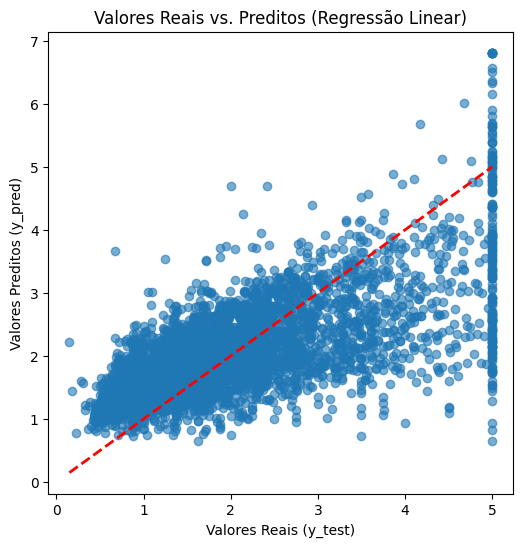

In [127]:
# Valores Reais vs Preditos
 
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Valores Preditos (y_pred)")
plt.title("Valores Reais vs. Preditos (Regressão Linear)")
plt.show()